<a href="https://colab.research.google.com/github/yardsale8/DSCI_210_R_notebooks/blob/main/activity_7_4_more_reshaping_table_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacking and Unstacking in R

# Stack and Unstack


* `library(tidyr)`
* Stack $\rightarrow$ `gather`
* Unstack $\rightarrow$ `spread`

In [ ]:
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Stacking columns with `gather()`

The function `gather` from the `tidyr` library is used to stack columns.

Arguments are:

1. label column name
2. data column name
3. then a list of columns to stack

##### Imperative syntax:
```{R}
new_df <- gather(old_df, key = "lbl1", value = "lbl2", col1, col2, col3, ...)
```

#### Piping syntax:
```{R}
data %>%
  gather(key = "lbl1", value = "lbl2", col1, col2, col3, ...)
```

### A familiar example

In [ ]:
sales <- read.csv("https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/data/auto_sales.csv")
sales

Salesperson,Compact,Sedan,SUV,Truck
Ann,22,18,15,12
Bob,19,12,17,20
Yolanda,19,8,32,15
Xerxes,12,23,18,9


#### Option 1: spell out all stacking columns

In [ ]:
stacked_sales <- (
  sales
    %>% gather(key = "auto_type",
               value = "num_sales",
               Compact, Sedan, SUV, Truck)
)
head(stacked_sales)

Salesperson,auto_type,num_sales
Ann,Compact,22
Bob,Compact,19
Yolanda,Compact,19
Xerxes,Compact,12
Ann,Sedan,18
Bob,Sedan,12


#### Option 2: refer to column range

In [ ]:
stacked_sales <- (
  sales
    %>% gather(key = "auto_type",
               value = "num_sales",
               Compact:Truck)
)
head(stacked_sales)

Salesperson,auto_type,num_sales
Ann,Compact,22
Bob,Compact,19
Yolanda,Compact,19
Xerxes,Compact,12
Ann,Sedan,18
Bob,Sedan,12


#### Option 3: select by exclusion

In [ ]:
stacked_sales <- (
  sales
    %>% gather(key = "auto_type",
               value = "num_sales",
               -Salesperson)
)
head(stacked_sales)

Salesperson,auto_type,num_sales
Ann,Compact,22
Bob,Compact,19
Yolanda,Compact,19
Xerxes,Compact,12
Ann,Sedan,18
Bob,Sedan,12


## <font color="red"> Exercise 7.3.1 </font>

Notice that the years are all in separate columns in the `world_bank_fresh_download.csv`.  

In [ ]:
world_bank = read.csv("https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/data/world_bank_fresh_download.csv")
head(world_bank)

Country,Region,Indicator,X1960,X1961,X1962,X1963,X1964,X1965,X1966,⋯,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
Algeria,Africa,Total_population,1.112489e+07,1.140486e+07,1.169015e+07,1.198513e+07,1.229597e+07,1.262695e+07,1.298027e+07,⋯,3.374933e+07,3.426197e+07,3.481106e+07,3.540179e+07,3.603616e+07,3.671713e+07,3.743943e+07,3.818614e+07,3.893433e+07,39666519
Algeria,Africa,CO2_emissions,5.537636e-01,5.318100e-01,4.849537e-01,4.528245e-01,4.595689e-01,5.224485e-01,6.494806e-01,⋯,2.990267e+00,3.189978e+00,3.205183e+00,3.428472e+00,3.309912e+00,3.316038e+00,NA,NA,NA,NA
Algeria,Africa,Life_expectancy,4.613512e+01,4.659032e+01,4.704500e+01,4.749620e+01,4.794190e+01,4.837610e+01,4.879080e+01,⋯,7.255771e+01,7.289837e+01,7.321932e+01,7.352102e+01,7.380405e+01,7.407000e+01,7.432410e+01,7.456895e+01,7.480810e+01,NA
Algeria,Africa,Internet_usage,NA,NA,NA,NA,NA,NA,NA,⋯,7.375985e+00,9.451191e+00,1.018000e+01,1.123000e+01,1.250000e+01,1.400000e+01,1.522803e+01,1.650000e+01,1.809000e+01,NA
Angola,Africa,Total_population,5.270844e+06,5.367287e+06,5.465905e+06,5.565808e+06,5.665701e+06,5.765025e+06,5.863568e+06,⋯,1.854147e+07,1.918391e+07,1.984225e+07,2.052010e+07,2.121995e+07,2.194230e+07,2.268563e+07,2.344820e+07,2.422752e+07,25021974
Angola,Africa,CO2_emissions,1.043571e-01,8.471841e-02,2.160253e-01,2.068771e-01,2.161741e-01,2.060890e-01,2.651641e-01,⋯,1.200877e+00,1.311096e+00,1.369425e+00,1.430873e+00,1.401654e+00,1.354008e+00,NA,NA,NA,NA


**Question:** Why is this a violation of the Golden Rule?

> Your answer here

**Task:** Fix this issue by

1. Use `gather` in a pipe to stack all these columns.  Store the years in a column called `year` and the number in a column called `values`.
2. Using `mutate`, `gsub`, and `as.numeric` to clean up the resulting `year` column and convert it to a numeric column.
3. Save the resulting dataframe to a variable named `world_bank_stacked`

In [ ]:
# Your code here

## Unstacking columns with `spread()`

The function `spread`, also from the `tidyr` library, is used to stack columns.

Arguments:

1. Column to split on
2. Column to split

#### Imperative syntac:

```{r}
new_df <- spread(old_df, key = col1, value = col2)
```
#### Piping:

```{r}
data %>%
  spread(key = col1, value = col2)
```

#### A simple unstack

In [ ]:
head(stacked_sales)

Salesperson,auto_type,num_sales
Ann,Compact,22
Bob,Compact,19
Yolanda,Compact,19
Xerxes,Compact,12
Ann,Sedan,18
Bob,Sedan,12


In [ ]:
(stacked_sales
 %>% spread(key = auto_type,
            value = num_sales)
 )

Salesperson,Compact,Sedan,SUV,Truck
Ann,22,18,15,12
Bob,19,12,17,20
Xerxes,12,23,18,9
Yolanda,19,8,32,15


## <font color="red"> Exercise 7.3.2 </font>

Continuing the `world_bank_fresh_download.csv`, notice that the labels in the `Indicator` column are actually variables.



In [ ]:
head(world_bank_stacked)

ERROR: Error in head(world_bank_stacked): object 'world_bank_stacked' not found


**Question:** Why is this a violation of the Golden Rule?

> Your answer here

**Task:** Fix this issue by

1. Use `spread` in a pipe to unstack all these labels into their own columns.
2. Save the resulting dataframe to a variable named `world_bank_clean`

In [ ]:
# Your code here

## The stack + mutate + aggregate +  unstack trick

Recall that we can use stacking and unstacking columns to automate applying the same transformations to many columns

### Example - Recoding auto sales

In [ ]:
(sales
 %>% gather(key = "auto_type",
            value = "num_sales",
            Compact:Truck)
 %>% mutate(car_type = recode(auto_type,
                             `Compact` = 'car',
                             `Sedan` = 'car',
                             `SUV` = 'utility',
                             `Truck` = 'utility'))
 %>% group_by(Salesperson,
              car_type)
 %>% summarize(total_sales = sum(num_sales))
 %>% spread(key = car_type,
            value = total_sales)
 )

`summarise()` regrouping output by 'Salesperson' (override with `.groups` argument)


Salesperson,car,utility
Ann,40,27
Bob,31,37
Xerxes,35,27
Yolanda,27,47


## <font color="red"> Exercise 7.3.3 </font>

Recall that the MoMA `Artist.csv` data had two columns (`BeginDate` and `EndDate`) that needed to be cleaned up by  replacing zeros with with a better representation of missing values, namely `NA` in R.

Since we need to perform the same transformations on both columns, we can use the stack + transform + unstack trick to clean both columns at once.

In [ ]:
artist = read.csv("https://github.com/MuseumofModernArt/collection/raw/master/Artists.csv")
head(artist)

ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki.QID,ULAN
1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,,NA
2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,,NA
3,Bill Arnold,"American, born 1941",American,Male,1941,0,,NA
4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998
5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,,NA
6,Danilo Aroldi,"Italian, born 1925",Italian,Male,1925,0,,NA


**Task:** Fix this issue by

1. Use `gather` stack the two columns.
2. Using `mutate` and `ifelse` to replace all zeros with `NA`.
3. Use `spread` to unstack the two columns, this time giving them more meaningful names.

In [ ]:
# Your code here

## <font color="red"> Exercise 7.3.4 </font>

In this assignment we will visualize the effect of the introduction of the  designated hitter, by comparing the best overall team-wide earned run average (ERA) for each league. In the process, you will see an important application of reshaping tables when creating visualizations.  

Take a look at the `Teams.csv` file.  This file contains, for each season, team-by-team statistics.  We will focus on the ERA, which measures the average number of runs allowed by each team’s pitchers over a 9-inning game, with a smaller number indicating better pitching + defense.
Your job is to recreate the following graph.  

<img src="https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/img/min_era.png"/>

In [ ]:
teams <- read.csv('https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/data/Teams.csv')
head(teams)

yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,⋯,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1871,NA,BS1,BNA,,3,31,NA,20,10,⋯,24,0.834,Boston Red Stockings,South End Grounds I,NA,103,98,BOS,BS1,BS1
1871,NA,CH1,CNA,,2,28,NA,19,9,⋯,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NA,104,102,CHI,CH1,CH1
1871,NA,CL1,CFC,,8,29,NA,10,19,⋯,15,0.818,Cleveland Forest Citys,National Association Grounds,NA,96,100,CLE,CL1,CL1
1871,NA,FW1,KEK,,7,19,NA,7,12,⋯,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NA,101,107,KEK,FW1,FW1
1871,NA,NY2,NNA,,5,33,NA,16,17,⋯,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NA,90,88,NYU,NY2,NY2
1871,NA,PH1,PNA,,1,28,NA,21,7,⋯,13,0.845,Philadelphia Athletics,Jefferson Street Grounds,NA,102,98,ATH,PH1,PH1


**Tasks:**

1. Filter the data to only the years after World War II (1946+).
2. Group and aggregate the data to compute the minimum ERA for each league for each season.
3. Split the min(ERA) by the leagues so that you have the two columns of min(ERA) values—one for each league—with one row per year.
4. Compute AL – NL, storing the result in a new column.
5. Stack the data for the AL, NL, and AL – NL, with the labels column called Type and the data column called min(ERA).
6. Save the resulting data frame to a variable named `min_era_by_league`

In [ ]:
# Your code here

The `ggplot2` library can be used to create the graph.  Since creating plots with `ggplot2` is outside the scope of the course, I have provided the code needed to create this plot.  

**Note:** Creating plots in `ggplot2` is covered in detail in DSCI 310, which is offered next fall.  If you enjoy creating visualizations, think about taking this course!

In [ ]:
library(ggplot2)

ggplot(min_era_by_league) +
  geom_line(aes(x = yearID, y = min_era, color = league)) +
  geom_hline(yintercept = 0) +
  geom_vline(xintercept = 1973, linetype = "dotted") +
  annotate("text", x = 1958, y = 1, label = "DH introduced to the AL in 1973", size = 3)

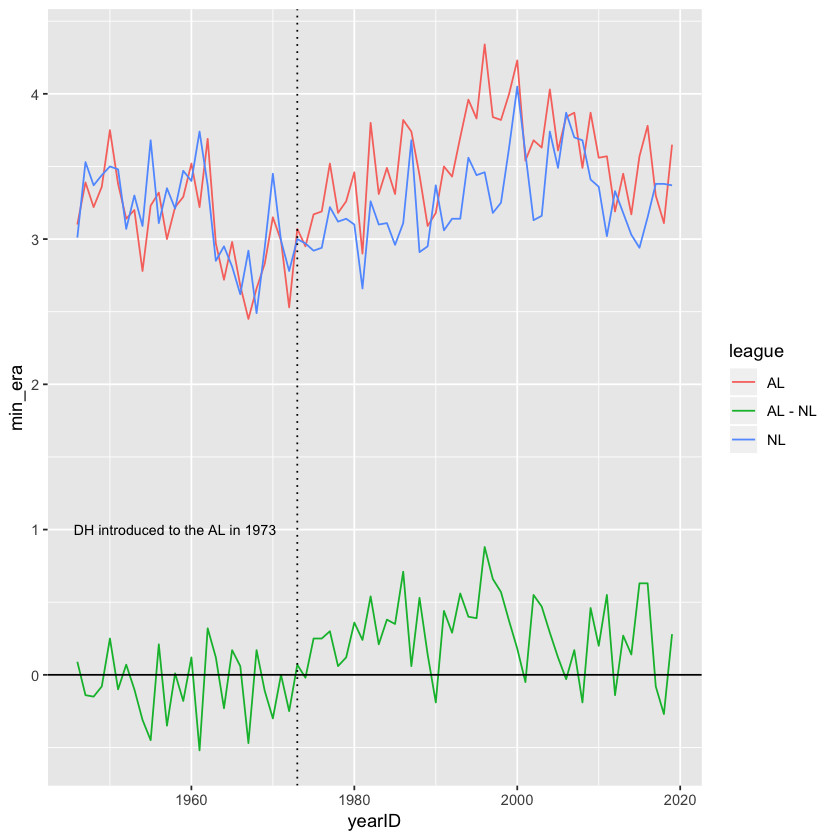

In [ ]:
library(ggplot2)

ggplot(min_era_by_league) +
  geom_line(aes(x = yearID, y = min_era, color = league)) +
  geom_hline(yintercept = 0) +
  geom_vline(xintercept = 1973, linetype = "dotted") +
  annotate("text", x = 1958, y = 1, label = "DH introduced to the AL in 1973", size = 3)

# Translating JMP to `dplyr/tidyr`

### Stack/`gather`

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/translate_gather_0.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/translate_gather_1.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/translate_gather_2.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/translate_gather_3.png">

### Unstack/`spread()`

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/unstack_1.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/unstack_2.png">

<img width="850" src="https://raw.githubusercontent.com/WSU-DataScience/DSCI_210_R_notebooks/main/img/unstack_3.png">